In [1]:
import pandas as pd

In [2]:
players = pd.read_csv('all_seasons.csv')
players.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [3]:
nonbench = players.loc[players['gp'] >= 30]
nonbench['gp'].head()

0    55
3    64
5    52
6    80
7    77
Name: gp, dtype: int64

In [4]:
teams = nonbench.groupby(by=['team_abbreviation', 'season']).mean()
teams.head()

Unnamed: 0        age  player_height  \
team_abbreviation season                                           
ATL               1996-97   205.000000  28.181818     204.123636   
                  1997-98   703.000000  28.750000     202.353333   
                  1998-99  1088.181818  29.272727     201.352727   
                  1999-00  1481.416667  26.666667     201.718333   
                  2000-01  1943.846154  25.769231     200.660000   

                           player_weight         gp       pts       reb  \
team_abbreviation season                                                  
ATL               1996-97     105.480758  63.727273  9.718182  4.172727   
                  1997-98     103.078782  61.666667  9.550000  4.141667   
                  1998-99     101.852022  43.000000  8.672727  4.118182   
                  1999-00     101.831404  64.333333  9.358333  4.308333   
                  2000-01      98.673706  60.769231  8.123077  3.438462   

                                ast  net_rating  oreb_pct  dreb_pct   usg_pct  \
team_abbreviation season                                                        
ATL               1996-97  1.918182    3.836364  0.066818  0.135909  0.191455   
                  1997-98  1.833333    0.916667  0.073833  0.139750  0.197667   
                  1998-99  1.527273    0.427273  0.062000  0.131727  0.205818   
                  1999-00  1.750000   -6.991667  0.061250  0.131000  0.199583   
                  2000-01  1.784615   -5.269231  0.058000  0.131615  0.192308   

                             ts_pct   ast_pct  
team_abbreviation season                       
ATL               1996-97  0.535818  0.123636  
                  1997-98  0.524917  0.111167  
                  1998-99  0.475182  0.115909  
                  1999-00  0.497750  0.118750  
                  2000-01  0.499308  0.118846

In [5]:
average_height = teams['player_height'].reset_index()
average_height.head()

,team_abbreviation,season,player_height
0,ATL,1996-97,204.123636
1,ATL,1997-98,202.353333
2,ATL,1998-99,201.352727
3,ATL,1999-00,201.718333
4,ATL,2000-01,200.660000


In [6]:
records = pd.read_csv('Team_Records.csv')
records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [7]:
records['Team'] = records['Team'].apply(lambda x: x.replace("*","")) 
records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [8]:
records['Team'].unique()

array(['Boston Celtics', 'Toronto Raptors', 'New York Knicks',
       'Philadelphia 76ers', 'Syracuse Nationals', 'Brooklyn Nets',
       'New Jersey Nets', 'New York Nets', 'New Jersey Americans',
       'Minnesota Timberwolves', 'Oklahoma City Thunder',
       'Seattle SuperSonics', 'Denver Nuggets', 'Denver Rockets',
       'Portland Trail Blazers', 'Utah Jazz', 'New Orleans Jazz',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Fort Wayne Pistons',
       'Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls',
       'Golden State Warriors', 'San Francisco Warriors',
       'Philadelphia Warriors', 'Los Angeles Clippers',
       'San Diego Clippers', 'Buffalo Braves', 'Phoenix Suns',
       'Sacramento Kings', 'Kansas City Kings', 'Kansas City-Omaha Kings',
       'Cincinnati Royals', 'Rochester Royals', 'Los Angeles Lakers',
       'Minneapolis Lakers', 'Washington Wizards', 'Washington Bullets',
       'Capital Bullets', 'Baltimore Bullets', 'Chicago Zephyrs',
       'Chicago Pac

In [9]:
seasons = average_height['season'].unique()
print(seasons)

['1996-97' '1997-98' '1998-99' '1999-00' '2000-01' '2001-02' '2002-03'
 '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09' '2009-10'
 '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16' '2016-17'
 '2017-18' '2018-19' '2019-20']


In [10]:
records = records[records['Season'].isin(seasons)]
records

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,2000-01,NBA,Vancouver Grizzlies,23,59,0.280,7,-4.94,91.7,0.4,99.6,-3.4,105.8,2.8,NaN,S. Lowe (23-59),S. Abdur-Rahim (8.5)
1478,1999-00,NBA,Vancouver Grizzlies,22,60,0.268,7,-5.10,91.0,-2.1,102.3,-1.8,108.5,4.4,NaN,B. Hill (4-18) L. Hollins (18-42),S. Abdur-Rahim (8.8)
1479,1998-99,NBA,Vancouver Grizzlies,8,42,0.160,7,-8.94,89.0,0.1,98.4,-3.8,107.9,5.7,NaN,B. Hill (8-42),S. Abdur-Rahim (4.6)
1480,1997-98,NBA,Vancouver Grizzlies,19,63,0.232,6,-7.47,92.1,1.8,104.1,-0.9,112.0,7.0,NaN,B. Hill (19-63),S. Abdur-Rahim (6.9)


In [11]:
records['Team'].unique()

array(['Boston Celtics', 'Toronto Raptors', 'New York Knicks',
       'Philadelphia 76ers', 'Brooklyn Nets', 'New Jersey Nets',
       'Minnesota Timberwolves', 'Oklahoma City Thunder',
       'Seattle SuperSonics', 'Denver Nuggets', 'Portland Trail Blazers',
       'Utah Jazz', 'Cleveland Cavaliers', 'Detroit Pistons',
       'Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls',
       'Golden State Warriors', 'Los Angeles Clippers', 'Phoenix Suns',
       'Sacramento Kings', 'Los Angeles Lakers', 'Washington Wizards',
       'Washington Bullets', 'Miami Heat', 'Charlotte Hornets',
       'Charlotte Bobcats', 'Orlando Magic', 'Atlanta Hawks',
       'Houston Rockets', 'San Antonio Spurs', 'New Orleans Pelicans',
       'New Orleans Hornets', 'New Orleans/Oklahoma City Hornets',
       'Dallas Mavericks', 'Memphis Grizzlies', 'Vancouver Grizzlies'],
      dtype=object)

In [12]:
average_height['team_abbreviation'].unique()

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN',
       'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL',
       'MIN', 'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI',
       'PHX', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS'],
      dtype=object)

In [13]:
abbreviations = {}
with open('NBA_Team_Abbr-Sheet1.csv') as f:
    for row in f:
        abbreviation, name = row.strip().split(",")
        abbreviations[name] = abbreviation

abbreviations['New Jersey Nets'] = 'NJN'
abbreviations['Charlotte Bobcats'] = 'CHA'
abbreviations['Seattle SuperSonics'] = 'SEA'
abbreviations['Washington Bullets'] = 'WAS'
abbreviations['New Orleans/Oklahoma City Hornets'] = 'NOK'
abbreviations['New Orleans Hornets'] = 'NOH'
abbreviations['Vancouver Grizzlies'] = 'VAN'

abbreviations

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BKN',
 'Boston Celtics': 'BOS',
 'Charlotte Hornets': 'CHA',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHX',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS',
 'New Jersey Nets': 'NJN',
 'Charlotte Bobcats': 'CHA',
 'Seattle SuperSonics': 'SEA',
 'Washington Bullets': 'WAS',
 'New Orleans/Oklahoma City Hornets': 'NO

In [14]:
records['team_abbreviation'] = records['Team'].apply(lambda x: abbreviations[x])
records.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,team_abbreviation
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7),BOS
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),BOS
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7),BOS
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5),BOS
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1),BOS


In [15]:
records = records.rename(columns={"Season": "season"})
records.head()

,season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,team_abbreviation
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7),BOS
1,2016-17,NBA,Boston Celtics,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),BOS
2,2015-16,NBA,Boston Celtics,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7),BOS
3,2014-15,NBA,Boston Celtics,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5),BOS
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1),BOS


In [16]:
average_height_success = pd.merge(average_height, records, on=['season', 'team_abbreviation'])
average_height_success = average_height_success.drop(['W', 'L', 'Coaches', 'Top WS', 'Team', 'Lg', 'Finish'], axis=1)

In [17]:
def get_season(x):
    return int(x[:4])

average_height_success['season'] = average_height['season'].apply(get_season)
average_height_success

,team_abbreviation,season,player_height,W/L%,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs
0,ATL,1996,204.123636,0.683,5.52,86.8,-3.3,108.5,1.8,102.3,-4.4,Lost E. Conf. Semis
1,ATL,1997,202.353333,0.610,3.85,87.7,-2.6,108.2,3.2,104.3,-0.7,Lost E. Conf. 1st Rnd.
2,ATL,1998,201.352727,0.620,2.82,85.3,-3.6,100.5,-1.7,97.1,-5.1,Lost E. Conf. Semis
3,ATL,1999,201.718333,0.341,-5.41,91.7,-1.4,102.0,-2.1,107.9,3.8,NaN
4,ATL,2000,200.660000,0.305,-5.55,91.9,0.6,98.7,-4.3,104.3,1.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,WAS,2002,201.718333,0.537,0.48,93.2,-0.7,106.0,-0.7,104.6,-2.1,Lost E. Conf. Semis
642,WAS,2003,202.027692,0.561,0.17,93.7,-0.2,103.7,-1.9,103.0,-2.6,Lost E. Conf. Semis
643,WAS,2004,200.841429,0.500,-0.50,98.5,2.7,105.3,-1.1,105.8,-0.6,NaN
644,WAS,2005,200.115714,0.598,1.36,97.4,1.0,111.2,2.4,109.3,0.5,Lost E. Conf. Semis


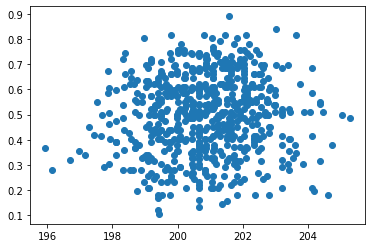

In [18]:
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from numpy.polynomial.polynomial import polyfit

plot.scatter(x=average_height_success['player_height'], y=average_height_success['W/L%'])

<AxesSubplot:>

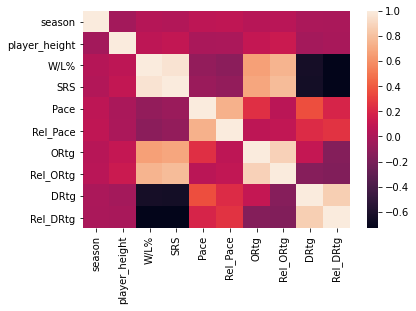

In [19]:
sns.heatmap(average_height_success.corr())

In [20]:
average_height_success.corr()

,season,player_height,W/L%,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg
season,1.000000,-0.029034,0.041551,0.031200,0.078968,0.081008,0.049856,0.054586,0.000208,-0.001777
player_height,-0.029034,1.000000,0.079235,0.096474,-0.006358,-0.000650,0.101669,0.128121,-0.022216,-0.011806
W/L%,0.041551,0.079235,1.000000,0.965017,-0.093127,-0.128187,0.667513,0.755161,-0.632350,-0.725768
SRS,0.031200,0.096474,0.965017,1.000000,-0.067921,-0.093283,0.694453,0.785777,-0.638217,-0.732395
Pace,0.078968,-0.006358,-0.093127,-0.067921,1.000000,0.739707,0.246373,0.064675,0.363499,0.189834
Rel_Pace,0.081008,-0.000650,-0.128187,-0.093283,0.739707,1.000000,0.077385,0.086873,0.223992,0.255767
ORtg,0.049856,0.101669,0.667513,0.694453,0.246373,0.077385,1.000000,0.879617,0.102450,-0.150469
Rel_ORtg,0.054586,0.128121,0.755161,0.785777,0.064675,0.086873,0.879617,1.000000,-0.147011,-0.164963
DRtg,0.000208,-0.022216,-0.632350,-0.638217,0.363499,0.223992,0.102450,-0.147011,1.000000,0.867723
Rel_DRtg,-0.001777,-0.011806,-0.725768,-0.732395,0.189834,0.255767,-0.150469,-0.164963,0.867723,1.000000


In [21]:
old_people = average_height_success.loc[average_height_success['season']<= 1998]

old_people

,team_abbreviation,season,player_height,W/L%,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs
0,ATL,1996,204.123636,0.683,5.52,86.8,-3.3,108.5,1.8,102.3,-4.4,Lost E. Conf. Semis
1,ATL,1997,202.353333,0.610,3.85,87.7,-2.6,108.2,3.2,104.3,-0.7,Lost E. Conf. 1st Rnd.
2,ATL,1998,201.352727,0.620,2.82,85.3,-3.6,100.5,-1.7,97.1,-5.1,Lost E. Conf. Semis
32,BOS,1996,200.073846,0.439,-2.40,92.6,1.3,101.4,-1.6,103.7,0.7,NaN
33,BOS,1997,201.121818,0.598,1.75,92.5,1.8,103.4,-1.1,101.0,-3.5,Lost E. Conf. Finals
...,...,...,...,...,...,...,...,...,...,...,...,...
624,WAS,1997,202.969091,0.537,1.77,92.4,2.3,106.6,-0.1,104.9,-1.8,Lost E. Conf. 1st Rnd.
625,WAS,1998,200.429091,0.512,1.11,91.8,1.5,105.2,0.2,104.5,-0.5,NaN
635,WAS,1996,203.430909,0.524,-0.61,89.5,-2.9,109.2,1.7,109.6,2.1,Lost E. Conf. 1st Rnd.
636,WAS,1997,201.930000,0.232,-6.98,91.0,-0.7,105.4,-2.9,113.6,5.3,NaN


In [22]:
old_people.corr()

,season,player_height,W/L%,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg
season,1.000000,-0.061700,-0.002096,0.010711,-0.034110,-0.082464,-0.000474,-0.016338,-0.010950,-0.025514
player_height,-0.061700,1.000000,0.128888,0.134223,-0.029902,-0.083913,0.161862,0.283825,-0.011147,0.064064
W/L%,-0.002096,0.128888,1.000000,0.965575,-0.288656,-0.338001,0.533973,0.646258,-0.699845,-0.775786
SRS,0.010711,0.134223,0.965575,1.000000,-0.223221,-0.288666,0.595381,0.691368,-0.670053,-0.765789
Pace,-0.034110,-0.029902,-0.288656,-0.223221,1.000000,0.775770,0.144080,-0.012637,0.406627,0.301857
Rel_Pace,-0.082464,-0.083913,-0.338001,-0.288666,0.775770,1.000000,-0.138004,-0.117050,0.224155,0.290967
ORtg,-0.000474,0.161862,0.533973,0.595381,0.144080,-0.138004,1.000000,0.837612,0.188950,-0.083075
Rel_ORtg,-0.016338,0.283825,0.646258,0.691368,-0.012637,-0.117050,0.837612,1.000000,-0.070466,-0.075934
DRtg,-0.010950,-0.011147,-0.699845,-0.670053,0.406627,0.224155,0.188950,-0.070466,1.000000,0.874279
Rel_DRtg,-0.025514,0.064064,-0.775786,-0.765789,0.301857,0.290967,-0.083075,-0.075934,0.874279,1.000000


<AxesSubplot:xlabel='player_height', ylabel='W/L%'>

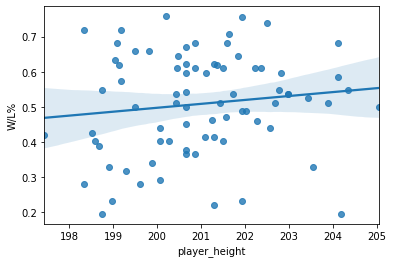

In [23]:
sns.regplot(x=old_people['player_height'], y=old_people['W/L%'])

In [31]:
young_people = average_height_success.loc[average_height_success['season'] > 2015]
young_people


,team_abbreviation,season,player_height,W/L%,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,success_per_cm
20,ATL,2016,200.478571,0.524,-1.23,97.4,1.0,104.9,-3.9,105.7,-3.1,Lost E. Conf. 1st Rnd.,382.592694
21,ATL,2017,200.890909,0.257,-4.47,97.1,0.0,106.7,-1.1,111.4,3.6,NaN,781.676689
22,BKN,2018,199.878462,0.598,1.25,88.8,-3.2,108.2,2.3,106.2,0.3,Lost E. Conf. 1st Rnd.,334.244919
23,BKN,2019,200.269231,0.537,-1.58,91.4,-2.5,106.7,0.0,107.7,1.0,Lost E. Conf. Semis,372.940839
28,BOS,2016,204.611111,0.183,-6.62,95.8,5.7,103.9,-2.8,111.4,4.7,NaN,1118.093503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,UTA,2019,200.025000,0.756,5.73,89.2,-1.1,112.7,7.7,105.4,0.4,Lost Finals,264.583333
619,VAN,2016,199.390000,0.171,-10.17,88.4,-1.7,100.3,-6.4,111.8,5.1,NaN,1166.023392
620,VAN,2017,199.505455,0.232,-7.47,92.1,1.8,104.1,-0.9,112.0,7.0,NaN,859.937304
621,VAN,2018,200.660000,0.160,-8.94,89.0,0.1,98.4,-3.8,107.9,5.7,NaN,1254.125000


In [32]:
young_people.corr()

,season,player_height,W/L%,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,success_per_cm
season,1.000000,-0.117805,0.058798,0.046140,-0.044564,-0.049448,-0.030020,0.040973,-0.107234,-0.043884,-0.131098
player_height,-0.117805,1.000000,0.180861,0.195424,0.017705,0.132275,0.091379,0.156282,-0.196768,-0.158055,-0.046451
W/L%,0.058798,0.180861,1.000000,0.976367,-0.058355,-0.132462,0.745954,0.827755,-0.745620,-0.796042,-0.906205
SRS,0.046140,0.195424,0.976367,1.000000,-0.011672,-0.085338,0.755326,0.831609,-0.762471,-0.820939,-0.879638
Pace,-0.044564,0.017705,-0.058355,-0.011672,1.000000,0.718704,0.150369,-0.022668,0.199505,0.032857,0.060397
Rel_Pace,-0.049448,0.132275,-0.132462,-0.085338,0.718704,1.000000,-0.063701,-0.016961,0.102045,0.164818,0.182636
ORtg,-0.030020,0.091379,0.745954,0.755326,0.150369,-0.063701,1.000000,0.864870,-0.158400,-0.388166,-0.691510
Rel_ORtg,0.040973,0.156282,0.827755,0.831609,-0.022668,-0.016961,0.864870,1.000000,-0.403040,-0.373272,-0.736469
DRtg,-0.107234,-0.196768,-0.745620,-0.762471,0.199505,0.102045,-0.158400,-0.403040,1.000000,0.866370,0.654457
Rel_DRtg,-0.043884,-0.158055,-0.796042,-0.820939,0.032857,0.164818,-0.388166,-0.373272,0.866370,1.000000,0.728763


<AxesSubplot:xlabel='player_height', ylabel='W/L%'>

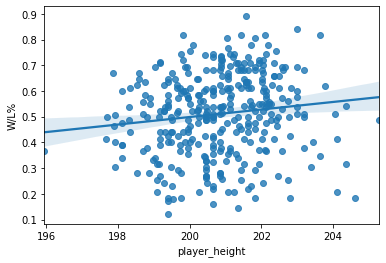

In [27]:
sns.regplot(x=young_people['player_height'], y=young_people['W/L%'])

In [28]:
average_height_success['success_per_cm'] = average_height_success['player_height'] / average_height_success['W/L%']

success = average_height_success.groupby('season').mean().reset_index()
success

,season,player_height,W/L%,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,success_per_cm
0,1996,201.065184,0.511500,0.387692,91.092308,-0.315385,105.361538,-0.111538,104.969231,-0.503846,437.421845
1,1997,201.076710,0.503462,0.391154,91.619231,-0.223077,105.742308,0.015385,105.396154,-0.330769,454.313385
2,1998,200.816919,0.510769,0.490769,90.876923,-0.746154,105.357692,-0.223077,104.869231,-0.711538,425.510290
3,1999,200.746152,0.454038,-1.247308,91.946154,-0.373077,104.861538,-0.769231,106.303846,0.673077,502.888154
4,2000,200.953423,0.483769,-0.496154,92.146154,0.007692,106.165385,0.280769,106.680769,0.796154,478.704719
5,2001,201.235660,0.466630,-1.017778,92.259259,-0.233333,105.062963,-0.792593,106.177778,0.322222,505.194727
6,2002,200.533944,0.453407,-0.998148,91.788889,-0.388889,105.792593,-0.270370,106.900000,0.837037,499.046199
7,2003,200.792480,0.512407,-0.042963,91.929630,-0.437037,105.425926,-0.396296,105.455556,-0.366667,424.562183
8,2004,200.780937,0.474964,-0.635714,91.996429,0.039286,105.567857,-0.485714,106.325000,0.271429,476.870574
9,2005,200.625431,0.486000,-0.171429,92.935714,0.339286,106.053571,0.142857,106.260714,0.350000,485.052803


<AxesSubplot:xlabel='season', ylabel='success_per_cm'>

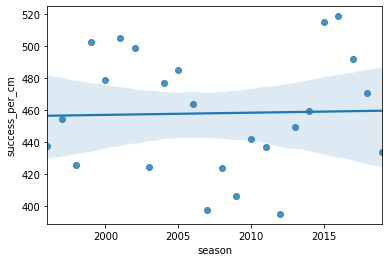

In [30]:
sns.regplot(x=success['season'], y=success['success_per_cm'])